![Py4Eng](img/logo.png)

# Inference and transfer learning with pre-trained models
## Yoav Ram

In this session we will pre-trained models to classify images.
In this case, the models were pre-trained by other researchers.
We start with TensorFlow and then show an example with Keras.

# Inference with pre-trained models

Using pre-trained models is easy with Keras.

Let's load the [ResNet50 model](https://keras.io/applications/#resnet50) directly from the `keras.applications` module, together with some processing utilities. This follows code from [Keras docs](https://keras.io/applications/).

[ResNet50](https://github.com/KaimingHe/deep-residual-networks) was developed by Microsoft and was also trained on ImageNet data.
It uses [residual learning](https://arxiv.org/abs/1512.03385) to train very deep networks, up to 152 layers.
A nice summmary on residual learning is available [here](https://blog.waya.ai/deep-residual-learning-9610bb62c355).

In [ ]:
%matplotlib inline
import numpy as np
import tensorflow as tf
try:
    import keras
except ModuleNotFoundError:
    from tensorflow import keras
print('GPU:', tf.test.is_gpu_available())
import seaborn as sns
sns.set(
    style='ticks',
    context='talk',
    palette='Set1'
)

First, load the model (including downloading it, which may take some time).

In [2]:
model = keras.applications.resnet50.ResNet50(weights='imagenet')

Now, let's view the ResNet50 architecture.

In [5]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

That's really nice.

Load an image, convert it to array, and preprocess it for ResNet50.

In [3]:
img_path = '../data/Kobe_Bryant_2014.jpg'
img = keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
x = keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = keras.applications.resnet50.preprocess_input(x)

Now use the model to predict and then decode the predictions into a list of tuples (class, description, probability), one such list for each sample in the batch.

basketball (prob = 0.9996)
bathing_cap (prob = 5.822e-05)
volleyball (prob = 4.813e-05)


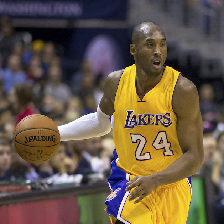

In [4]:
preds = model.predict(x)
decoded_preds = keras.applications.resnet50.decode_predictions(preds, top=3)[0]
# print('Predicted:', decode_predictions(preds, top=3))
# print(preds)
for id_, label, prob in decoded_preds:
    print('{} (prob = {:.4g})'.format(label, prob))
img

# Transfer learning

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
try:
    import keras
except ModuleNotFoundError:
    from tensorflow import keras
print('GPU:', tf.test.is_gpu_available())

GPU: True


In *transfer learning* we transfer knowledge gained on one problem to solve another problem.

In this case, we'll use the model we trained on MNIST digits to solve the MNIST-fashion: This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST (see [keras docs](https://keras.io/datasets/) for details). The class labels are:


| Label |	Description|
|---|------------------|
| 0 |	T-shirt/top    |
| 1 |	Trouser        |
| 2 |	Pullover       |
| 3 |	Dress          |
| 4 |	Coat           |
| 5 |	Sandal         |
| 6 |	Shirt          |
| 7 |	Sneaker        |
| 8 |	Bag            |
| 9 |	Ankle boot     |

We load the fashion-MNIST data.

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
num_classes = np.unique(y_train).size
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


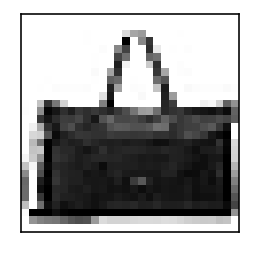

In [3]:
i = np.random.randint(0, x_train.shape[0])
plt.figure(figsize=(2,2))
plt.imshow(x_train[i, :, :], cmap='gray_r')
plt.xticks([]); plt.yticks([])
print(y_train[i])

Let's load the model we trained on MNIST data in the [CNN session](K_CNN.ipynb).

In [18]:
# don't worry if warning comes out
model = keras.models.load_model('../data/keras_cnn_model.h5') 

Now, we re-train the model on the new data.

In [19]:
history = model.fit(
    x_train, y_train,
    batch_size=50,
    epochs=5,
    validation_data=(x_test, y_test)
).history

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.4386 - accuracy: 0.8433 - val_loss: 0.3300 - val_accuracy: 0.8785
Epoch 2/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.2942 - accuracy: 0.8923 - val_loss: 0.3106 - val_accuracy: 0.8819
Epoch 3/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.2545 - accuracy: 0.9058 - val_loss: 0.2837 - val_accuracy: 0.8963
Epoch 4/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2267 - accuracy: 0.9164 - val_loss: 0.2738 - val_accuracy: 0.9024
Epoch 5/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2053 - accuracy: 0.9228 - val_loss: 0.2639 - val_accuracy: 0.9069


In [20]:
scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.2638896326839924
Test accuracy: 0.9069


When starting from fresh (i.e. random weights, see [solution](solutions/CNN.ipynb)), I got to validation accuracy 0.7815 after one epoch and to 0.8776 after 10 epochs.
So this approach is certainly faster, if you already have another network to start with.

# Refernces

[Transfer learning example](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html): use ResNet50 to quickly train a classifeir on a small Dogs vs. Cats dataset.

# Colophon
This notebook was written by [Yoav Ram](http://python.yoavram.com).

The notebook was written using [Python](http://python.org/) 3.7.

This work is licensed under a [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/) International License.

![Python logo](https://www.python.org/static/community_logos/python-logo.png)